In [1]:
import numpy as np
import pandas as pd 

C:\Users\Almog\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# getting the dataframe 
df=pd.read_csv(r"C:\Users\Almog\winequalityN.csv") 
# the quiestion is :can you predict the wine's type based on the other features 

In [3]:
# showing the first 10 (0-9) rows
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [4]:
# checking the empty spots 
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
# ignoting the empty spots
df.dropna(inplace=True)

In [6]:
# changcing red=0,white=1
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
dict(zip(le.classes_, le.transform(le.classes_)))
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,1,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [7]:
# setting up y label
y = df.type
y.head()

0    1
1    1
2    1
3    1
4    1
Name: type, dtype: int64

In [8]:
# setting up x label, aka the features
X = df.drop(['type'],axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
# knn:


# Benefits of knn :
# very simple classifier that works well on basic recognition problems.
# uses uniform weights, each point in the local neighborhood contributes uniformly to the classification of a query point

In [10]:
# using cross validation to get the best percentage of success
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

k_range = list(range(1, 61))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance',p=1)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9469324962556407, 0.9469324962556407, 0.950957981826099, 0.9517322148903489, 0.9495643144592092, 0.9526588541542054, 0.9508015082710868, 0.952192304563573, 0.9518839033213548, 0.9535852541618615, 0.9528114996100123, 0.9521935008445744, 0.94879055990736, 0.9492549561921898, 0.9490999181743796, 0.9487907991635603, 0.9484819194089417, 0.9483273599035318, 0.9473990458462731, 0.9475533660954824, 0.947089209066853, 0.9480180016365125, 0.9469346495614435, 0.9464707317890143, 0.9456969772371652, 0.9456974557495658, 0.9455426569879558, 0.9455433747565568, 0.944768423923706, 0.9449234619415161, 0.944149707389667, 0.9444590656566865, 0.944613625162096, 0.9443040276388762, 0.9444583478880855, 0.9438396313540466, 0.9435305123432274, 0.9432209148200075, 0.9429113172967878, 0.943375474325417, 0.9430658768021974, 0.9430663553145978, 0.9427560400227772, 0.9422918829941478, 0.9416729272039085, 0.941363568936889, 0.9413633296806887, 0.9408991726520594, 0.9407446131466497, 0.9412085309190787, 0.9408994

Text(0,0.5,'Cross validation Accuracy')

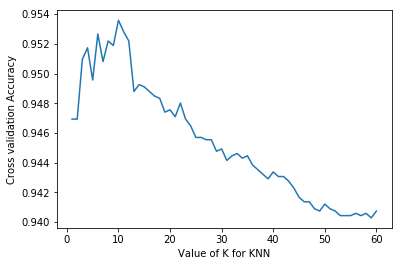

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

# graph of the value of k (x) and the cross validation accuracy (y)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross validation Accuracy')

In [12]:
# getting my x and y train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X ,y ,random_state=1)

C:\Users\Almog\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


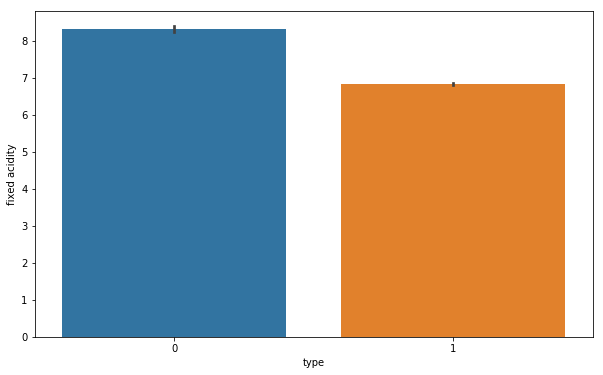

In [13]:
# looking at how each feature effect on the type of the wine
import seaborn as sns


# fixed acidity:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'type', y = 'fixed acidity', data = df)

C:\Users\Almog\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


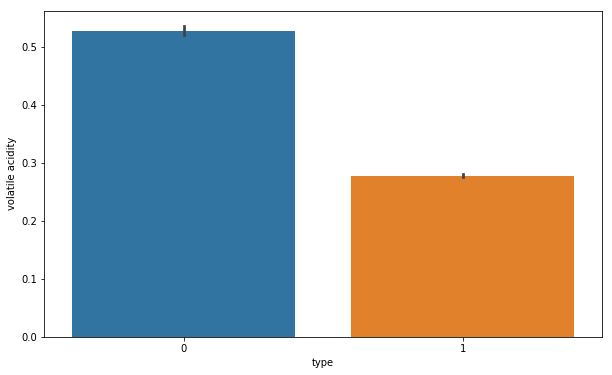

In [14]:
# volatile acidity:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'type', y = 'volatile acidity', data = df)

C:\Users\Almog\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


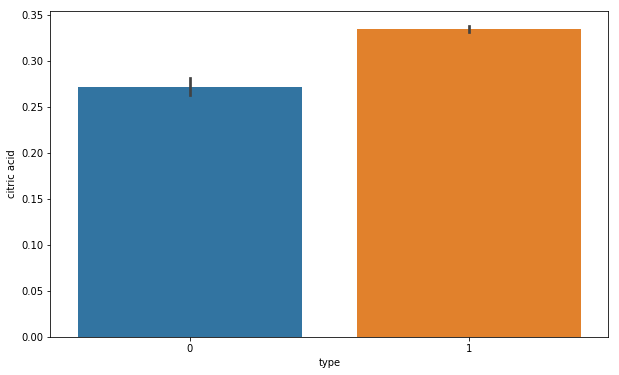

In [15]:
# citric acid:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'type', y = 'citric acid', data = df)

C:\Users\Almog\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


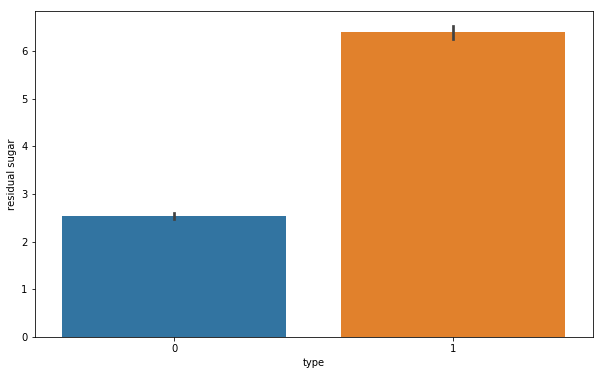

In [16]:
# residual sugar:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'type', y = 'residual sugar', data = df)

C:\Users\Almog\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


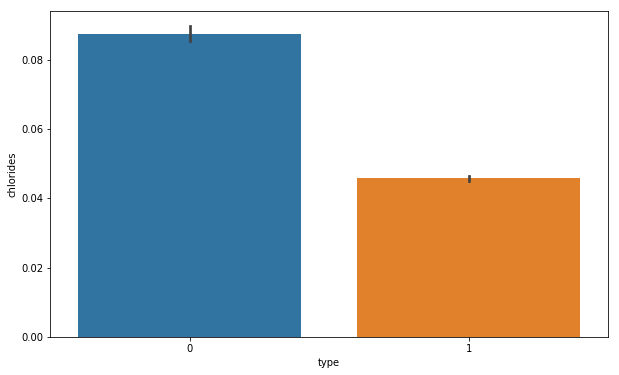

In [17]:
# chlorides:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'type', y = 'chlorides', data = df)

C:\Users\Almog\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


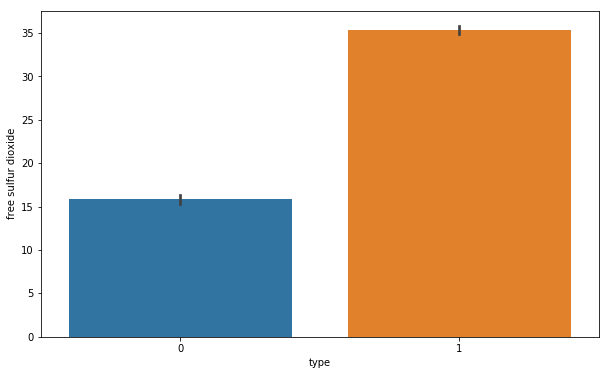

In [18]:
# free sulfur dioxide:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'type', y = 'free sulfur dioxide', data = df)

C:\Users\Almog\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


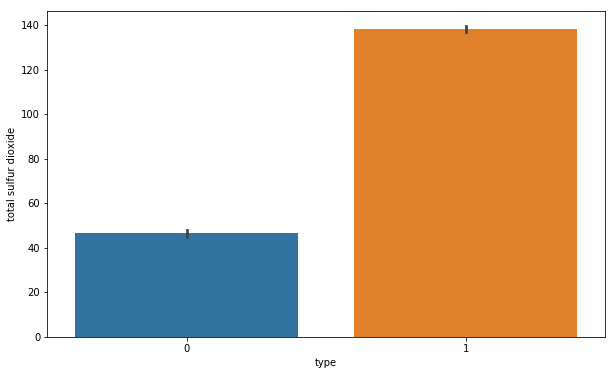

In [19]:
# total sulfur dioxide:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'type', y = 'total sulfur dioxide', data = df)

C:\Users\Almog\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


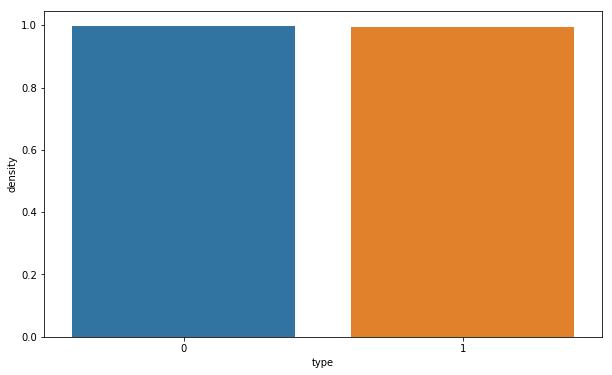

In [20]:
# density:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'type', y = 'density', data = df)

C:\Users\Almog\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


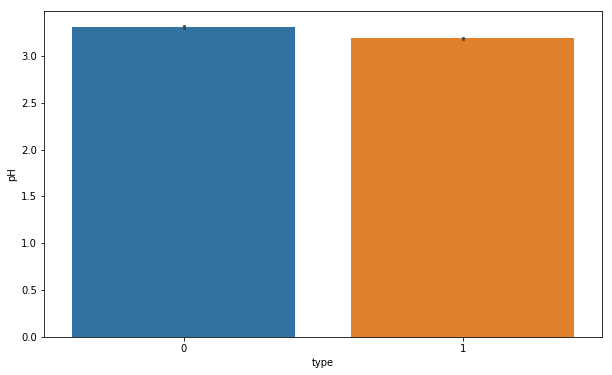

In [21]:
# pH:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'type', y = 'pH', data = df)

C:\Users\Almog\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


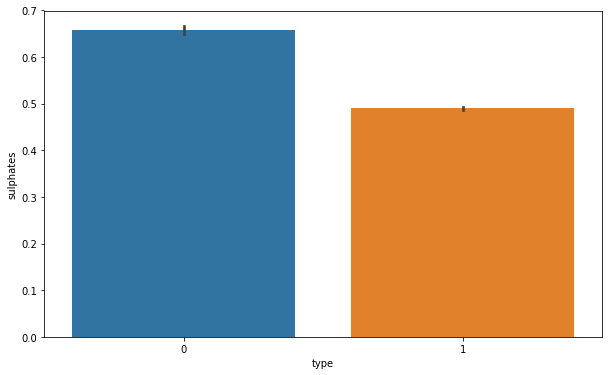

In [22]:
# sulphates:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'type', y = 'sulphates', data = df)

C:\Users\Almog\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


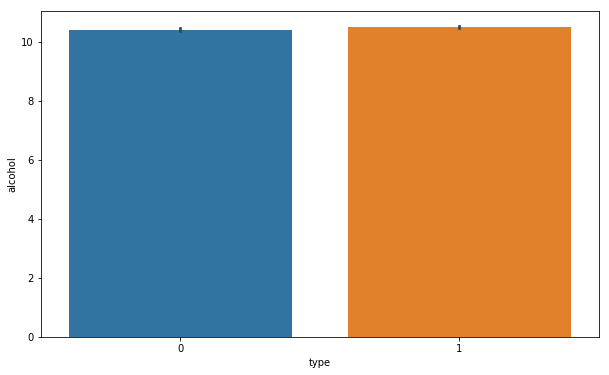

In [23]:
# alcohol:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'type', y = 'alcohol', data = df)

C:\Users\Almog\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


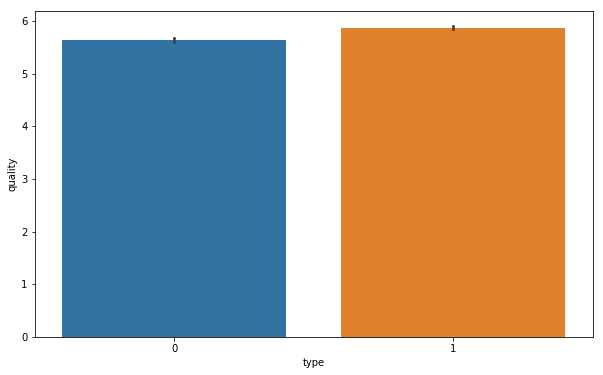

In [24]:
# quality:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'type', y = 'quality', data = df)

In [25]:
# using machin learning using knn model
# from the cross validation we can understand that the best k is 10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [26]:
# predicting based on the test 
y_pred = knn.predict(x_test)
print (y_pred)

[1 1 1 ... 0 0 0]


In [27]:
# checking the percentage of success 
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred)*100,'%')

94.80198019801979 %


In [28]:
# logistic regression :


# linear regression is a model made to calculate some dependent variable, y, based on some independent variable, x.
# y = mx + b

# benefits of logistic regression :
# the output of a logistic regression is more informative than other classification algorithms
# not only gives a measure of how relevant a predictor is (coefficient size) but also its direction of association.


In [29]:
# using machin learning using logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
# predicting based on the test 
y_pred = logreg.predict(x_test)
print (y_pred)

[1 1 1 ... 0 1 0]


In [31]:
# checking the percentage of success 
print(metrics.accuracy_score(y_test, y_pred)*100,'%')

98.57673267326733 %


In [32]:
# random forest :


# how it works :
# pick N random records from the dataset.
# build a decision tree based on these N records.
# choose the number of trees you want in your algorithm and repeat steps 1 and 2.
# each tree in the forest predicts the category to which the new record belongs. 
# the new record is assigned to the category that wins the majority vote.

# benefits of random forest :
# the algorithm is very stable. 
# works well when you have both categorical and numerical features.
# works well when data has missing values or it has not been scaled well.

# n_estimators default=10

In [33]:
# using machin learning using random forest model
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=10)
rf.fit(x_train, y_train);

C:\Users\Almog\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [34]:
# predicting based on the test 
y_pred = rf.predict(x_test)
print(y_pred)

[1 1 1 ... 0 1 0]


In [35]:
# checking the percentage of success
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred)*100,'%')

99.4430693069307 %
